# Baseline computation for the sentiment analysis task

We'll use Naive Bayes for calculating a baseline of performance for our sentiment classification task.

Naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature.

In [9]:
CSV_DATASET_PATH = 'google_play_store_reviews.csv'

In [10]:
import numpy as np
import pandas as pd

## Load dataset

Samples in the dataset: 12495

                                             message sentiment
0                      I cannot open the app anymore  negative
1  I have been begging for a refund from this app...  negative
2  Very costly for the premium version (approx In...  negative
3  Used to keep me organized, but all the 2020 UP...  negative
4                                Dan Birthday Oct 28  negative



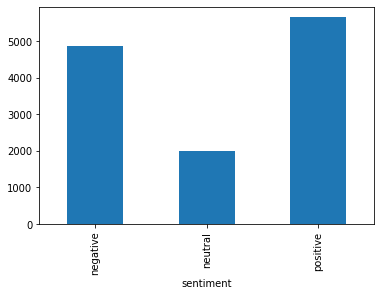

In [11]:
def score_to_sentiment(rating):
    rating = int(rating)
    if rating <= 2:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    else:
        return 'positive'

original_df = pd.read_csv(CSV_DATASET_PATH, sep=',')
df = pd.DataFrame()
df['message'] = original_df.content
df['sentiment'] = original_df.score.apply(score_to_sentiment)
df.dropna(inplace=True)
del original_df

print('Samples in the dataset:', df.shape[0], end='\n\n')
print(df.head(), end='\n\n')
df.groupby(['sentiment']).size().plot.bar()

## Vectorization and train-test split

We need to vectorize the text becaues Naive Bayes works on vectors. We'll use TF-IDF to account for the frequency of words in the corpus and in the individual texts.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

vectorizer = TfidfVectorizer()
text_counts = vectorizer.fit_transform(df['message'])

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(text_counts, df['sentiment'], test_size=0.25, random_state=5)

## Model definition

The specific NB model we're going to use is Complement NB, which is similar to Multinomial NB but works better with imbalanced classes.

In [14]:
from sklearn.naive_bayes import ComplementNB

classifier = ComplementNB()
classifier.fit(X_train, Y_train)

ComplementNB()

## Baseline test accuracy

In [15]:
from sklearn import metrics

predicted = classifier.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)

print('Accuracy:', str('{:04.2f}'.format(accuracy_score*100))+'%')

Accuracy: 68.41%


In [16]:
test_messages = [
    'Great app!',
    'It does what I expect, though not much more.',
    'This app is so bad!',
]
vectorized_test_messages = vectorizer.transform(test_messages)

predictions = classifier.predict(vectorized_test_messages)

for msg_key, predicted_sentiment in enumerate(predictions):
  print(f'"{test_messages[msg_key]}" → {predicted_sentiment}')

"Great app!" → positive
"It does what I expect, though not much more." → neutral
"This app is so bad!" → negative
